# The Recommender Engine Pool

*What is a recommender engine pool?*


The recommender engine pool is the data source from which the recommender engine gets its recommendations. It is made up of the (1)items considered for the recommendation and (2) measure/s that determines its fitness to be recommended.

We will create a Spotify track recommendation pool based on its genre.

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Tracks Genre Classification - multiple genres

This is similar to the previous notebook, but this time, we will predict more than 2 genres

### 1. Read and check values of multiple playlist sets

In [2]:
#genre_names = ["R&B", "Classical", "Country", "Electronic", "Hiphop","Jazz", "Pop", "Rock", "Reggae", "Rap"]
genre_names = ["OPM Rock", "OPM Rap", "OPM Reggae", "OPM Jazz", "OPM Dance", "OPM Acoustic"]

playlist_df_list = []
track_df_list = []
for genre in genre_names:
    # read and process the playlist data for keyword
    print(genre)
    pdf = pd.read_csv('sprint2 playlist/playlists/'+genre.lower()+'_playlist_data.csv')
    pdf['genre'] = genre.lower().replace('&','n')
    playlist_df_list.append(pdf)

    tdf = pd.read_csv('sprint2 playlist/playlists/'+genre.lower()+'_playlist_tracks_data.csv')
    tdf['genre'] = genre.lower().replace('&','n')
    tdf = tdf.drop(columns=['playlist_name'])
    tdf = tdf.merge(pdf[['playlist_id','playlist_name']], on=['playlist_id'], how='left')
    
    track_df_list.append(tdf)
        
playlist_df = pd.concat(playlist_df_list)
tracks_df = pd.concat(track_df_list)

OPM Rock
OPM Rap
OPM Reggae
OPM Jazz
OPM Dance
OPM Acoustic


In [3]:
tracks_df.columns

Index(['track_id', 'track_name', 'artist_id', 'artist_name', 'album_id',
       'duration', 'release_date', 'popularity', 'danceability', 'energy',
       'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'playlist_id',
       'genre', 'playlist_name'],
      dtype='object')

In [4]:
tracks_df['genre'].value_counts()

opm rock        2020
opm acoustic    1401
opm jazz         859
opm rap          791
opm dance        669
opm reggae       600
Name: genre, dtype: int64

In [5]:
#retain only distinct tracks per keyword
tracks_df =tracks_df.drop_duplicates(subset='track_id')
tracks_df.shape

(5302, 22)

In [6]:
tracks_df['genre'].value_counts()

opm rock        2020
opm acoustic     987
opm jazz         722
opm rap          648
opm dance        557
opm reggae       368
Name: genre, dtype: int64

In [7]:
#check shape
playlist_df.shape, tracks_df.shape

((191, 7), (5302, 22))

In [8]:
#check columns
print("Playlist dataset columns: %s \n" % playlist_df.columns.values)
print("Tracks dataset columns: %s" % tracks_df.columns.values)

Playlist dataset columns: ['playlist_id' 'playlist_name' 'playlist_total_tracks' 'owner_id'
 'owner_name' 'total_followers' 'genre'] 

Tracks dataset columns: ['track_id' 'track_name' 'artist_id' 'artist_name' 'album_id' 'duration'
 'release_date' 'popularity' 'danceability' 'energy' 'key' 'loudness'
 'mode' 'speechiness' 'acousticness' 'instrumentalness' 'liveness'
 'valence' 'tempo' 'playlist_id' 'genre' 'playlist_name']


array([[<AxesSubplot:title={'center':'total_followers'}>]], dtype=object)

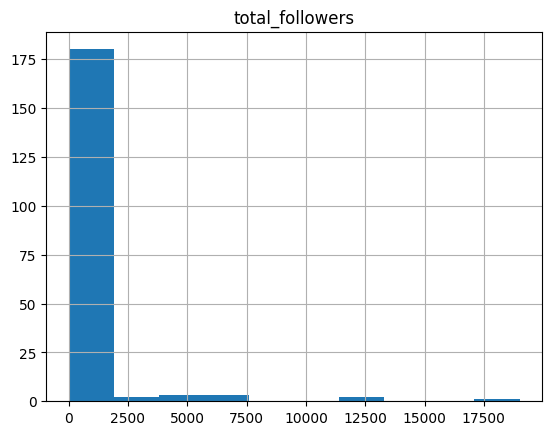

In [9]:
# What is the distribution of playlist's total tracks?
playlist_df[['total_followers']].hist()

## 2. Refine the training data

In [10]:
#get top 5 playlists per genre
#head will show top 5 followers since csv is already ordered
top_playlists_df = playlist_df.groupby('genre').head(5)
top_playlists_df

,playlist_id,playlist_name,playlist_total_tracks,owner_id,owner_name,total_followers,genre
0,2t76r0bHx984lCL0Xh9opc,OPM Rock,333,1168513315,Jervie Magsino,7299,opm rock
1,2TzrVWutUqGsFxbrzNF7BK,OPM rock and alternative 90s - 00s,214,3zc1k4i0n292wg6kvz3s79h3x,RobbieBuenaflor,6913,opm rock
2,75bXHC0AwXuwlKuwvCj7Wl,90's OPM rock band,244,walfridohidalgo,WalDo,3945,opm rock
3,3YxnOW4qcAgDpNm0JKBfXD,All 2005 - 2006 OPM Rock,115,ampirino,ampirino,708,opm rock
4,0PrNkmzeKii79HFVM3JJdA,OPM ROCK BANDS,103,ayayosuke024,nanaxxiv,634,opm rock
0,3iJxknKGQffZFFADEHqJJa,OPM Rap 2022,82,frankdumanlang,Frank,5279,opm rap
1,2u6zknTadqdYk9nePzY2yW,CHILL OPM RAP 2018-2022,242,21knt7ksvrtjajafd67f546ny,Jom Tan,1925,opm rap
2,7qCxm40IWjCworo3GNJfs5,Best OPM Rap Compilation 🇵🇭,44,213jix5qkzbdmcpladmzioppa,Jessie 🎹🇮🇹🎶,1130,opm rap
3,0ayOvntJ7iJ1AjCtifemjb,90's OPM RAP,36,rodeliong10,rodeliong10,861,opm rap
4,17ITmIvxgzN6ROUIxBLlOs,OPM RAP SONGS 2022,107,89zgxi3vlzdneiayme5kdm3o6,Best of OPM,762,opm rap


In [11]:
tracks_df = tracks_df[tracks_df['playlist_id'].isin(top_playlists_df['playlist_id'].values)]
tracks_df['genre'].value_counts()

opm rock        767
opm acoustic    390
opm rap         351
opm jazz        236
opm dance       178
opm reggae      157
Name: genre, dtype: int64

> Q: Given the number of genres for prediction, what minimum accuracy value can we expect from the model?

In [12]:
1/8

0.125

## 3. Feature Engineering

##### Conversions/Scaling

In [13]:
#convert duration from ms to mins
tracks_df['duration_mins']=tracks_df['duration']/60000

In [14]:
#Normalize loudness
from sklearn.preprocessing import MinMaxScaler #RobustScaler
scaler = MinMaxScaler()

tracks_df['loudness'] = scaler.fit_transform(tracks_df[['loudness']])
tracks_df['loudness'].describe()

count    2079.000000
mean        0.606361
std         0.145101
min         0.000000
25%         0.521057
50%         0.627794
75%         0.711516
max         1.000000
Name: loudness, dtype: float64

In [15]:
#Normalize tempo
tracks_df['tempo'] =  scaler.fit_transform(tracks_df[['tempo']])
#check
tracks_df['tempo'].describe()


count    2079.000000
mean        0.440838
std         0.182590
min         0.000000
25%         0.288506
50%         0.454221
75%         0.551779
max         1.000000
Name: tempo, dtype: float64

###### Categorical Encoding

In [16]:
tracks_df["genre"] = tracks_df["genre"].astype('category')
tracks_df.dtypes

track_id              object
track_name            object
artist_id             object
artist_name           object
album_id              object
duration               int64
release_date          object
popularity             int64
danceability         float64
energy               float64
key                    int64
loudness             float64
mode                   int64
speechiness          float64
acousticness         float64
instrumentalness     float64
liveness             float64
valence              float64
tempo                float64
playlist_id           object
genre               category
playlist_name         object
duration_mins        float64
dtype: object

In [17]:
tracks_df['genre'].value_counts()

opm rock        767
opm acoustic    390
opm rap         351
opm jazz        236
opm dance       178
opm reggae      157
Name: genre, dtype: int64

In [18]:
tracks_df['genre_id'] = tracks_df["genre"].cat.codes
tracks_df.head()

,track_id,track_name,artist_id,artist_name,album_id,duration,release_date,popularity,danceability,energy,...,acousticness,instrumentalness,liveness,valence,tempo,playlist_id,genre,playlist_name,duration_mins,genre_id
0,5iNGxZ1waiyMFylg4QAHk6,Same Ground,4OjU5UP0GFWeniBC82sGBY,Kitchie Nadal,7beVKW0o7iRoM0eRT3kGfk,267680,2004-01-01,60,0.616,0.525,...,0.3080,0.000004,0.1610,0.456,0.651211,2t76r0bHx984lCL0Xh9opc,opm rock,OPM Rock,4.461333,5
1,3Swi55QZ2Hw1yKCMYNNzCK,Shirley,7374lH6kwx9uQATYQ9H3Cp,Eraserheads,26ZfEBGPkGWOIagjRIyLVE,241280,2006-10-10,33,0.296,0.952,...,0.0167,0.033900,0.0505,0.370,0.639374,2t76r0bHx984lCL0Xh9opc,opm rock,OPM Rock,4.021333,5
2,5TaaSfaEGyYSekPSz4m1bW,Tindahan Ni Aling Nena,7374lH6kwx9uQATYQ9H3Cp,Eraserheads,26ZfEBGPkGWOIagjRIyLVE,185746,2006-10-10,31,0.657,0.712,...,0.0689,0.000000,0.3260,0.694,0.534513,2t76r0bHx984lCL0Xh9opc,opm rock,OPM Rock,3.095767,5
3,6ctVWFuLs1udLdDDUzqLXG,"Hey, Jay",7374lH6kwx9uQATYQ9H3Cp,Eraserheads,26ZfEBGPkGWOIagjRIyLVE,279813,2006-10-10,32,0.454,0.540,...,0.3030,0.000003,0.1290,0.890,0.514175,2t76r0bHx984lCL0Xh9opc,opm rock,OPM Rock,4.663550,5
4,5nmglzjbUxSzai7gQbsOqY,Kailan Lounge,7374lH6kwx9uQATYQ9H3Cp,Eraserheads,26ZfEBGPkGWOIagjRIyLVE,197360,2006-10-10,37,0.514,0.301,...,0.9620,0.007930,0.1130,0.501,0.410630,2t76r0bHx984lCL0Xh9opc,opm rock,OPM Rock,3.289333,5


In [19]:
tracks_df[['genre_id','genre']].drop_duplicates().set_index('genre_id').to_dict()['genre']

{5: 'opm rock',
 3: 'opm rap',
 4: 'opm reggae',
 2: 'opm jazz',
 1: 'opm dance',
 0: 'opm acoustic'}

In [20]:
genre_lookup = dict(tracks_df.groupby('genre_id').head(1)[['genre_id','genre']].sort_values('genre_id').values)
genre_lookup

{0: 'opm acoustic',
 1: 'opm dance',
 2: 'opm jazz',
 3: 'opm rap',
 4: 'opm reggae',
 5: 'opm rock'}

In [21]:
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,roc_curve, auc, confusion_matrix, classification_report,\
    ConfusionMatrixDisplay, plot_roc_curve

Select audio features to use for the model

In [23]:
# create feature matrix (X)
# pick energy and tempo as features
feature_cols =  ['danceability', 'energy', 'acousticness', 'valence','speechiness']

X = tracks_df[feature_cols]
y = tracks_df['genre_id']
print(len(X),len(y))

2079 2079


## 5. Model Tuning: kNN

Perform KNN using K= [2..50] and validate using k-fold = 5

In [24]:
#check indices used in folds
KFOLDS=5
kf = KFold(n_splits=KFOLDS)
for i,(train, test) in enumerate(kf.split(X)):
    #generate indices to use for the k-fold splits
    full_range = np.arange(len(X)).tolist()
    gap = [x for x in full_range if x not in train]
    if (i>0)&(i<KFOLDS-1):
        print("K=%d, train idx: %d-%d, %d-%d (n=%d), test idx:  %d-%d (n=%d)" % (i, min(train), min(gap), max(gap), max(train),len(train),\
                                                                     min(test), max(test), len(test)))
    else:
         print("K=%d, train idx: %d-%d (n=%d), test idx:  %d-%d (n=%d)" % (i, min(train), max(train),len(train),\
                                                                     min(test), max(test), len(test)))

K=0, train idx: 416-2078 (n=1663), test idx:  0-415 (n=416)
K=1, train idx: 0-416, 831-2078 (n=1663), test idx:  416-831 (n=416)
K=2, train idx: 0-832, 1247-2078 (n=1663), test idx:  832-1247 (n=416)
K=3, train idx: 0-1248, 1663-2078 (n=1663), test idx:  1248-1663 (n=416)
K=4, train idx: 0-1663 (n=1664), test idx:  1664-2078 (n=415)


In [25]:
n_neighbors = np.arange(2,51)
KFOLDS = 5

cv_scores_mean = []
cv_scores_std = []

for K in n_neighbors:
    print('Fitting KNN with K=%d ...' % K, end='')
    #initialize model
    knn_model = KNeighborsClassifier(n_neighbors=K)
    # get accuracy metric across train-test sets generated using k-folds
    scores = cross_val_score(knn_model, X, y, cv=KFOLDS, scoring='accuracy')
    # overall accuracy score of K is mean of accuracy scores per k-fold
    # std dev of scores across folds must be a minimum
    cv_scores_mean.append(scores.mean())
    cv_scores_std.append(scores.std())
    print('DONE!')

Fitting KNN with K=2 ...DONE!
Fitting KNN with K=3 ...

C:\Users\andre\Desktop\W.O.R.K\Eskwelabs\venv\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\andre\Desktop\W.O.R.K\Eskwelabs\venv\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\andre\Desktop\W.O.R.K\Eskwelabs\venv\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\andre\Desktop\W.O.R.K\Eskwelabs\venv\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\andre\Desktop\W.O.R.K\Eskwelabs\venv\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted w

DONE!
Fitting KNN with K=4 ...

C:\Users\andre\Desktop\W.O.R.K\Eskwelabs\venv\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\andre\Desktop\W.O.R.K\Eskwelabs\venv\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\andre\Desktop\W.O.R.K\Eskwelabs\venv\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\andre\Desktop\W.O.R.K\Eskwelabs\venv\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\andre\Desktop\W.O.R.K\Eskwelabs\venv\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted w

DONE!
Fitting KNN with K=5 ...DONE!
Fitting KNN with K=6 ...

C:\Users\andre\Desktop\W.O.R.K\Eskwelabs\venv\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\andre\Desktop\W.O.R.K\Eskwelabs\venv\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\andre\Desktop\W.O.R.K\Eskwelabs\venv\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\andre\Desktop\W.O.R.K\Eskwelabs\venv\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\andre\Desktop\W.O.R.K\Eskwelabs\venv\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted w

DONE!
Fitting KNN with K=7 ...

C:\Users\andre\Desktop\W.O.R.K\Eskwelabs\venv\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\andre\Desktop\W.O.R.K\Eskwelabs\venv\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\andre\Desktop\W.O.R.K\Eskwelabs\venv\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\andre\Desktop\W.O.R.K\Eskwelabs\venv\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


DONE!
Fitting KNN with K=8 ...

C:\Users\andre\Desktop\W.O.R.K\Eskwelabs\venv\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\andre\Desktop\W.O.R.K\Eskwelabs\venv\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\andre\Desktop\W.O.R.K\Eskwelabs\venv\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\andre\Desktop\W.O.R.K\Eskwelabs\venv\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\andre\Desktop\W.O.R.K\Eskwelabs\venv\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted w

DONE!
Fitting KNN with K=9 ...DONE!
Fitting KNN with K=10 ...

C:\Users\andre\Desktop\W.O.R.K\Eskwelabs\venv\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\andre\Desktop\W.O.R.K\Eskwelabs\venv\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\andre\Desktop\W.O.R.K\Eskwelabs\venv\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\andre\Desktop\W.O.R.K\Eskwelabs\venv\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


DONE!
Fitting KNN with K=11 ...DONE!
Fitting KNN with K=12 ...

C:\Users\andre\Desktop\W.O.R.K\Eskwelabs\venv\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\andre\Desktop\W.O.R.K\Eskwelabs\venv\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\andre\Desktop\W.O.R.K\Eskwelabs\venv\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\andre\Desktop\W.O.R.K\Eskwelabs\venv\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\andre\Desktop\W.O.R.K\Eskwelabs\venv\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted w

DONE!
Fitting KNN with K=13 ...DONE!
Fitting KNN with K=14 ...

C:\Users\andre\Desktop\W.O.R.K\Eskwelabs\venv\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\andre\Desktop\W.O.R.K\Eskwelabs\venv\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\andre\Desktop\W.O.R.K\Eskwelabs\venv\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\andre\Desktop\W.O.R.K\Eskwelabs\venv\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\andre\Desktop\W.O.R.K\Eskwelabs\venv\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted w

DONE!
Fitting KNN with K=15 ...DONE!
Fitting KNN with K=16 ...

C:\Users\andre\Desktop\W.O.R.K\Eskwelabs\venv\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\andre\Desktop\W.O.R.K\Eskwelabs\venv\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\andre\Desktop\W.O.R.K\Eskwelabs\venv\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\andre\Desktop\W.O.R.K\Eskwelabs\venv\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\andre\Desktop\W.O.R.K\Eskwelabs\venv\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted w

DONE!
Fitting KNN with K=17 ...DONE!
Fitting KNN with K=18 ...

C:\Users\andre\Desktop\W.O.R.K\Eskwelabs\venv\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\andre\Desktop\W.O.R.K\Eskwelabs\venv\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\andre\Desktop\W.O.R.K\Eskwelabs\venv\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\andre\Desktop\W.O.R.K\Eskwelabs\venv\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\andre\Desktop\W.O.R.K\Eskwelabs\venv\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted w

DONE!
Fitting KNN with K=19 ...DONE!
Fitting KNN with K=20 ...

C:\Users\andre\Desktop\W.O.R.K\Eskwelabs\venv\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\andre\Desktop\W.O.R.K\Eskwelabs\venv\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\andre\Desktop\W.O.R.K\Eskwelabs\venv\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\andre\Desktop\W.O.R.K\Eskwelabs\venv\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\andre\Desktop\W.O.R.K\Eskwelabs\venv\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted w

DONE!
Fitting KNN with K=21 ...DONE!
Fitting KNN with K=22 ...

C:\Users\andre\Desktop\W.O.R.K\Eskwelabs\venv\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\andre\Desktop\W.O.R.K\Eskwelabs\venv\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\andre\Desktop\W.O.R.K\Eskwelabs\venv\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\andre\Desktop\W.O.R.K\Eskwelabs\venv\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\andre\Desktop\W.O.R.K\Eskwelabs\venv\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted w

DONE!
Fitting KNN with K=23 ...DONE!
Fitting KNN with K=24 ...

C:\Users\andre\Desktop\W.O.R.K\Eskwelabs\venv\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\andre\Desktop\W.O.R.K\Eskwelabs\venv\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\andre\Desktop\W.O.R.K\Eskwelabs\venv\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\andre\Desktop\W.O.R.K\Eskwelabs\venv\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\andre\Desktop\W.O.R.K\Eskwelabs\venv\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted w

DONE!
Fitting KNN with K=25 ...

C:\Users\andre\Desktop\W.O.R.K\Eskwelabs\venv\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\andre\Desktop\W.O.R.K\Eskwelabs\venv\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\andre\Desktop\W.O.R.K\Eskwelabs\venv\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\andre\Desktop\W.O.R.K\Eskwelabs\venv\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\andre\Desktop\W.O.R.K\Eskwelabs\venv\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted w

DONE!
Fitting KNN with K=26 ...

C:\Users\andre\Desktop\W.O.R.K\Eskwelabs\venv\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\andre\Desktop\W.O.R.K\Eskwelabs\venv\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\andre\Desktop\W.O.R.K\Eskwelabs\venv\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\andre\Desktop\W.O.R.K\Eskwelabs\venv\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


DONE!
Fitting KNN with K=27 ...

C:\Users\andre\Desktop\W.O.R.K\Eskwelabs\venv\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\andre\Desktop\W.O.R.K\Eskwelabs\venv\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\andre\Desktop\W.O.R.K\Eskwelabs\venv\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\andre\Desktop\W.O.R.K\Eskwelabs\venv\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\andre\Desktop\W.O.R.K\Eskwelabs\venv\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted w

DONE!
Fitting KNN with K=28 ...DONE!
Fitting KNN with K=29 ...

C:\Users\andre\Desktop\W.O.R.K\Eskwelabs\venv\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\andre\Desktop\W.O.R.K\Eskwelabs\venv\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\andre\Desktop\W.O.R.K\Eskwelabs\venv\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\andre\Desktop\W.O.R.K\Eskwelabs\venv\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\andre\Desktop\W.O.R.K\Eskwelabs\venv\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted w

DONE!
Fitting KNN with K=30 ...DONE!
Fitting KNN with K=31 ...

C:\Users\andre\Desktop\W.O.R.K\Eskwelabs\venv\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\andre\Desktop\W.O.R.K\Eskwelabs\venv\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\andre\Desktop\W.O.R.K\Eskwelabs\venv\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\andre\Desktop\W.O.R.K\Eskwelabs\venv\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\andre\Desktop\W.O.R.K\Eskwelabs\venv\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted w

DONE!
Fitting KNN with K=32 ...DONE!
Fitting KNN with K=33 ...

C:\Users\andre\Desktop\W.O.R.K\Eskwelabs\venv\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\andre\Desktop\W.O.R.K\Eskwelabs\venv\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\andre\Desktop\W.O.R.K\Eskwelabs\venv\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\andre\Desktop\W.O.R.K\Eskwelabs\venv\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\andre\Desktop\W.O.R.K\Eskwelabs\venv\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted w

DONE!
Fitting KNN with K=34 ...

C:\Users\andre\Desktop\W.O.R.K\Eskwelabs\venv\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\andre\Desktop\W.O.R.K\Eskwelabs\venv\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\andre\Desktop\W.O.R.K\Eskwelabs\venv\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\andre\Desktop\W.O.R.K\Eskwelabs\venv\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\andre\Desktop\W.O.R.K\Eskwelabs\venv\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted w

DONE!
Fitting KNN with K=35 ...DONE!
Fitting KNN with K=36 ...

C:\Users\andre\Desktop\W.O.R.K\Eskwelabs\venv\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\andre\Desktop\W.O.R.K\Eskwelabs\venv\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\andre\Desktop\W.O.R.K\Eskwelabs\venv\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\andre\Desktop\W.O.R.K\Eskwelabs\venv\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\andre\Desktop\W.O.R.K\Eskwelabs\venv\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted w

DONE!
Fitting KNN with K=37 ...DONE!
Fitting KNN with K=38 ...

C:\Users\andre\Desktop\W.O.R.K\Eskwelabs\venv\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\andre\Desktop\W.O.R.K\Eskwelabs\venv\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\andre\Desktop\W.O.R.K\Eskwelabs\venv\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\andre\Desktop\W.O.R.K\Eskwelabs\venv\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\andre\Desktop\W.O.R.K\Eskwelabs\venv\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted w

DONE!
Fitting KNN with K=39 ...DONE!
Fitting KNN with K=40 ...

C:\Users\andre\Desktop\W.O.R.K\Eskwelabs\venv\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\andre\Desktop\W.O.R.K\Eskwelabs\venv\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\andre\Desktop\W.O.R.K\Eskwelabs\venv\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\andre\Desktop\W.O.R.K\Eskwelabs\venv\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\andre\Desktop\W.O.R.K\Eskwelabs\venv\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted w

DONE!
Fitting KNN with K=41 ...DONE!
Fitting KNN with K=42 ...

C:\Users\andre\Desktop\W.O.R.K\Eskwelabs\venv\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\andre\Desktop\W.O.R.K\Eskwelabs\venv\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\andre\Desktop\W.O.R.K\Eskwelabs\venv\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\andre\Desktop\W.O.R.K\Eskwelabs\venv\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\andre\Desktop\W.O.R.K\Eskwelabs\venv\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted w

DONE!
Fitting KNN with K=43 ...DONE!
Fitting KNN with K=44 ...

C:\Users\andre\Desktop\W.O.R.K\Eskwelabs\venv\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\andre\Desktop\W.O.R.K\Eskwelabs\venv\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\andre\Desktop\W.O.R.K\Eskwelabs\venv\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\andre\Desktop\W.O.R.K\Eskwelabs\venv\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\andre\Desktop\W.O.R.K\Eskwelabs\venv\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted w

DONE!
Fitting KNN with K=45 ...

C:\Users\andre\Desktop\W.O.R.K\Eskwelabs\venv\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\andre\Desktop\W.O.R.K\Eskwelabs\venv\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\andre\Desktop\W.O.R.K\Eskwelabs\venv\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\andre\Desktop\W.O.R.K\Eskwelabs\venv\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\andre\Desktop\W.O.R.K\Eskwelabs\venv\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted w

DONE!
Fitting KNN with K=46 ...

C:\Users\andre\Desktop\W.O.R.K\Eskwelabs\venv\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\andre\Desktop\W.O.R.K\Eskwelabs\venv\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\andre\Desktop\W.O.R.K\Eskwelabs\venv\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\andre\Desktop\W.O.R.K\Eskwelabs\venv\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\andre\Desktop\W.O.R.K\Eskwelabs\venv\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted w

DONE!
Fitting KNN with K=47 ...DONE!
Fitting KNN with K=48 ...

C:\Users\andre\Desktop\W.O.R.K\Eskwelabs\venv\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\andre\Desktop\W.O.R.K\Eskwelabs\venv\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\andre\Desktop\W.O.R.K\Eskwelabs\venv\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\andre\Desktop\W.O.R.K\Eskwelabs\venv\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\andre\Desktop\W.O.R.K\Eskwelabs\venv\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted w

DONE!
Fitting KNN with K=49 ...

C:\Users\andre\Desktop\W.O.R.K\Eskwelabs\venv\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\andre\Desktop\W.O.R.K\Eskwelabs\venv\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\andre\Desktop\W.O.R.K\Eskwelabs\venv\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\andre\Desktop\W.O.R.K\Eskwelabs\venv\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\andre\Desktop\W.O.R.K\Eskwelabs\venv\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted w

DONE!
Fitting KNN with K=50 ...DONE!


C:\Users\andre\Desktop\W.O.R.K\Eskwelabs\venv\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\andre\Desktop\W.O.R.K\Eskwelabs\venv\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\andre\Desktop\W.O.R.K\Eskwelabs\venv\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\andre\Desktop\W.O.R.K\Eskwelabs\venv\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\andre\Desktop\W.O.R.K\Eskwelabs\venv\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted w

Choose optimal value of K

The optimal number of neighbors is 42.00 with accuracy 0.5695


Text(0, 0.5, 'Accuracy standard deviation')

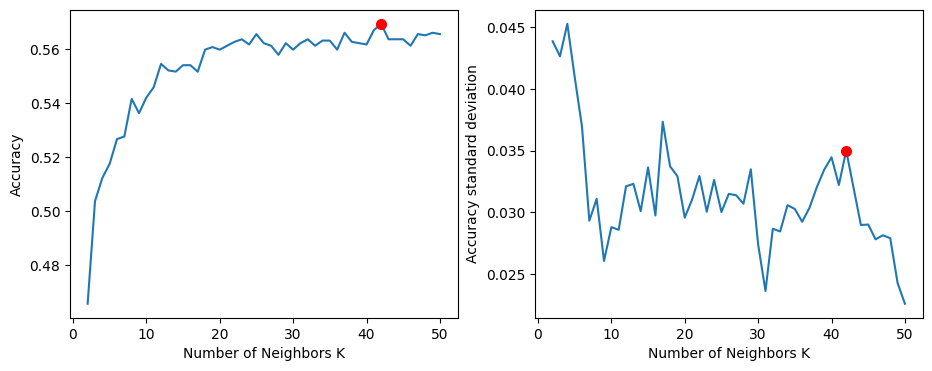

In [26]:
# determining best K
idx_max_accuracy = cv_scores_mean.index(max(cv_scores_mean))
optimal_K = n_neighbors[idx_max_accuracy]
print("The optimal number of neighbors is %0.2f with accuracy %0.4f" % (optimal_K, cv_scores_mean[idx_max_accuracy]))

# plot metrics 
fig,axs = plt.subplots(1,2, figsize=(11,4))
axs[0].plot(n_neighbors, cv_scores_mean)
axs[0].plot(optimal_K,max(cv_scores_mean), marker="o", ms=7, color='r')
axs[0].set_xlabel("Number of Neighbors K")
axs[0].set_ylabel("Accuracy")

axs[1].plot(n_neighbors, cv_scores_std)
axs[1].plot(optimal_K,cv_scores_std[idx_max_accuracy], marker="o", ms=7, color='r')
axs[1].set_xlabel("Number of Neighbors K")
axs[1].set_ylabel("Accuracy standard deviation")


Try out optimal model with entire length of the dataset

In [27]:
#initialize KNN with optimal K
knn_optimal_model = KNeighborsClassifier(n_neighbors=optimal_K)
# fitting the model with entire dataset
knn_optimal_model.fit(X, y)
#use model to predict y
knn_ypred = knn_optimal_model.predict(X)

C:\Users\andre\Desktop\W.O.R.K\Eskwelabs\venv\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


Create a classification report

In [28]:
# evaluate accuracy
acc = accuracy_score(y, knn_ypred) * 100
print('\nThe accuracy of the knn classifier for the full dataset using k = %d is %f%%' % (optimal_K, acc))


The accuracy of the knn classifier for the full dataset using k = 42 is 58.922559%


## 6. Model Tuning: SVM

Fit a **linear** kernel

In [29]:
def plot_scores(cv_scores_mean,cv_scores_std):
    fig,axs = plt.subplots(1,2, figsize=(11,4))
    
    x = np.arange(len(cv_scores_mean))
    max_mean_score_idx = cv_scores_mean.argmax()
    
    axs[0].plot(x, cv_scores_mean, marker='.', lw=0)
    axs[0].plot(x[max_mean_score_idx],max(cv_scores_mean), marker="o", ms=7, color='r')
    axs[0].set_xlabel("Model config type")
    axs[0].set_ylabel("Accuracy")

    axs[1].plot(x, cv_scores_std, marker='.', lw=0)
    axs[1].plot(x[max_mean_score_idx],cv_scores_std[max_mean_score_idx], marker="o", ms=7, color='r')
    axs[1].set_xlabel("Model config type")
    axs[1].set_ylabel("Accuracy standard deviation")


In [30]:
#Linear model
print('Fitting SVM with linear kernel...')

# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'kernel': ['linear']}
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 1, cv = KFOLDS )
# fitting the model for grid search
grid.fit(X, y)

#get scores
cv_scores_mean =  grid.cv_results_['mean_test_score']
cv_scores_std = grid.cv_results_['std_test_score']
max_mean_score_idx = cv_scores_mean.argmax()

print('Best model config score is %f%% (vs. overall mean score: %f )' % (100*cv_scores_mean[max_mean_score_idx],
                                                                        100*np.mean(cv_scores_mean)))
print('Std of best model score across folds is %f (vs. overall mean std: %f )' %\
      (cv_scores_std[max_mean_score_idx], np.mean(cv_scores_std)))

# get best model
svm_model1 = grid.best_estimator_
# fit model for entire data
svm_model1.fit(X, y)
pred1 = svm_model1.predict(X)
acc = accuracy_score(y, pred1) * 100
print('The accuracy of the SVM classifier for the full dataset is %f%%' % (acc))
print('DONE!')

Fitting SVM with linear kernel...
Fitting 5 folds for each of 5 candidates, totalling 25 fits
Best model config score is 58.585032% (vs. overall mean score: 55.785867 )
Std of best model score across folds is 0.016957 (vs. overall mean std: 0.017257 )
The accuracy of the SVM classifier for the full dataset is 59.884560%
DONE!


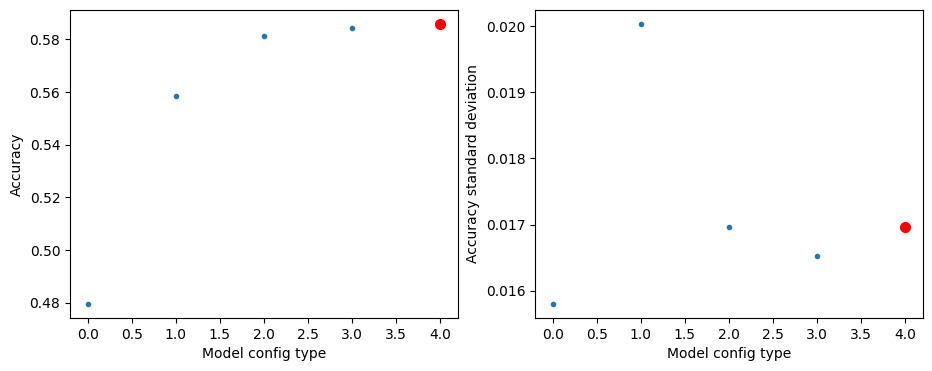

In [31]:
plot_scores(cv_scores_mean,cv_scores_std)

Fit a **polynomial** kernel

In [32]:
# defining parameter range
print('Fitting SVM with a polynomial kernel...')

param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'degree': [2,3,5],
              'kernel': ['poly']}
#1 worker:  12 mins
#2 workers: 8.6 mins
#3 workers: 7.1 mins
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 1, cv = KFOLDS, n_jobs=2)
# fitting the model for grid search
grid.fit(X, y)
print('Best model is %s' % grid.best_estimator_)

#get scores
cv_scores_mean =  grid.cv_results_['mean_test_score']
cv_scores_std = grid.cv_results_['std_test_score']
max_mean_score_idx = cv_scores_mean.argmax()

print('Best model config score is %f%% (vs. overall mean score: %f )' % (100*cv_scores_mean[max_mean_score_idx],
                                                                        100*np.mean(cv_scores_mean)))
print('Std of best model score across folds is %f (vs. overall mean std: %f )' %\
      (cv_scores_std[max_mean_score_idx], np.mean(cv_scores_std)))

# get best model
svm_model2 = grid.best_estimator_
# fit model for entire data
svm_model2.fit(X, y)
pred2 = svm_model2.predict(X)
acc = accuracy_score(y, pred2) * 100
print('The accuracy of the SVM classifier for the full dataset is %f%%' % (acc))
print('DONE!')

Fitting SVM with a polynomial kernel...
Fitting 5 folds for each of 75 candidates, totalling 375 fits
Best model is SVC(C=10, gamma=1, kernel='poly')
Best model config score is 58.728568% (vs. overall mean score: 42.964683 )
Std of best model score across folds is 0.024592 (vs. overall mean std: 0.006809 )
The accuracy of the SVM classifier for the full dataset is 61.231361%
DONE!


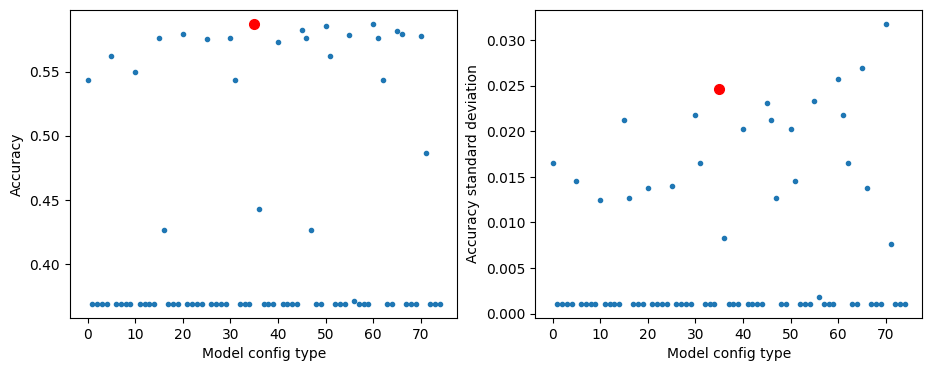

In [33]:
plot_scores(cv_scores_mean,cv_scores_std)

Fit a **radial** kernel

In [34]:
# defining parameter range
print('Fitting SVM with an rbf kernel...')

param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']}

grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 1, cv = KFOLDS, n_jobs=2)
# fitting the model for grid search
grid.fit(X, y)
print('Best model is %s' % grid.best_estimator_)

#get scores
cv_scores_mean =  grid.cv_results_['mean_test_score']
cv_scores_std = grid.cv_results_['std_test_score']
max_mean_score_idx = cv_scores_mean.argmax()

print('Best model config score is %f%% (vs. overall mean score: %f )' % (100*cv_scores_mean[max_mean_score_idx],
                                                                        100*np.mean(cv_scores_mean)))
print('Std of best model score across folds is %f (vs. overall mean std: %f )' %\
      (cv_scores_std[max_mean_score_idx], np.mean(cv_scores_std)))

# get best model
svm_model3 = grid.best_estimator_
# fit model for entire data
svm_model3.fit(X, y)
pred3 = svm_model3.predict(X)
acc = accuracy_score(y, pred3) * 100
print('The accuracy of the SVM classifier for the full dataset is %f%%' % (acc))
print('DONE!')

Fitting SVM with an rbf kernel...
Fitting 5 folds for each of 25 candidates, totalling 125 fits
Best model is SVC(C=100, gamma=1)
Best model config score is 59.401761% (vs. overall mean score: 49.644523 )
Std of best model score across folds is 0.028654 (vs. overall mean std: 0.013119 )
The accuracy of the SVM classifier for the full dataset is 62.818663%
DONE!


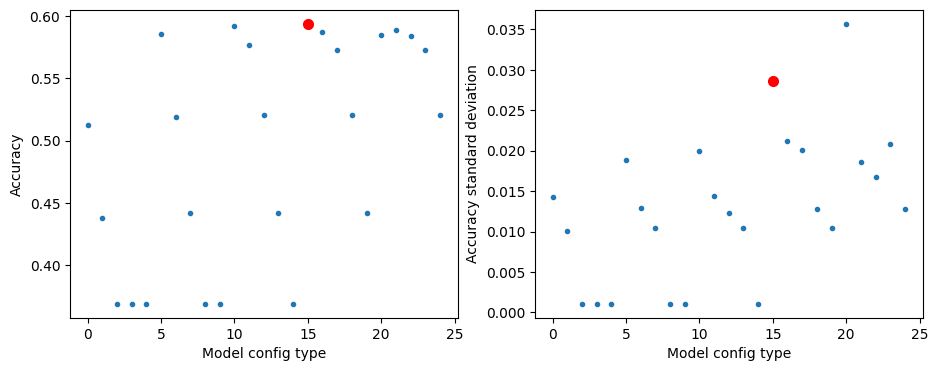

In [35]:
plot_scores(cv_scores_mean,cv_scores_std)

Select best SVM model

In [36]:
svm_optimal_model = svm_model3
#set probability=True to view classification probabilities and refit
svm_optimal_model.probability=True
svm_optimal_model.fit(X, y)
#use model to predict y
svm_ypred = svm_optimal_model.predict(X)

## 7. Model Selection

>Q: Which between KNN and SVM performed better? 

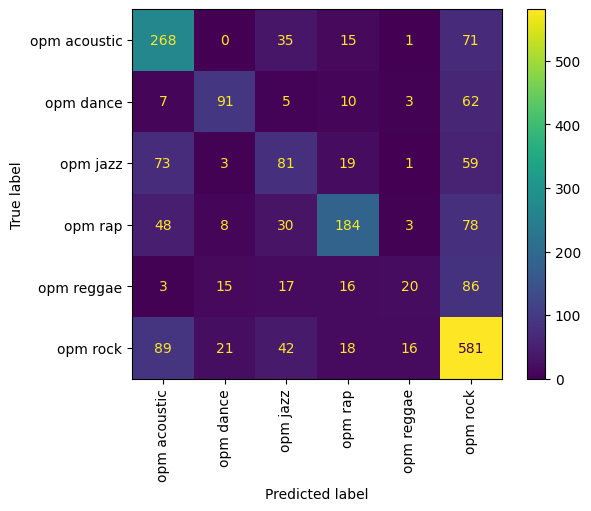

In [37]:
cm = confusion_matrix(y, knn_ypred)
cmd = ConfusionMatrixDisplay(cm, display_labels=list(genre_lookup.values()))
cmd.plot(xticks_rotation=90)

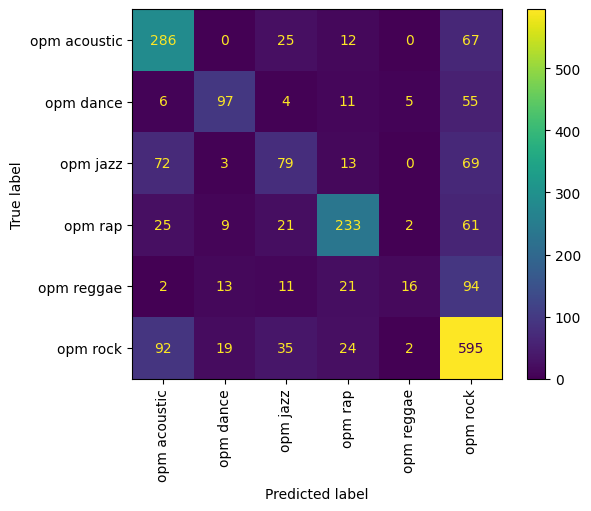

In [38]:
cm = confusion_matrix(y, svm_ypred)
cmd = ConfusionMatrixDisplay(cm, display_labels=list(genre_lookup.values()))
cmd.plot(xticks_rotation=90)

In [39]:
genre_lookup

{0: 'opm acoustic',
 1: 'opm dance',
 2: 'opm jazz',
 3: 'opm rap',
 4: 'opm reggae',
 5: 'opm rock'}

In [40]:
print('-------------------------------------------------------------')
print('KNN')
print(classification_report(y,knn_ypred))
print('-------------------------------------------------------------')
print('SVM')
print(classification_report(y,svm_ypred))

-------------------------------------------------------------
KNN
              precision    recall  f1-score   support

           0       0.55      0.69      0.61       390
           1       0.66      0.51      0.58       178
           2       0.39      0.34      0.36       236
           3       0.70      0.52      0.60       351
           4       0.45      0.13      0.20       157
           5       0.62      0.76      0.68       767

    accuracy                           0.59      2079
   macro avg       0.56      0.49      0.51      2079
weighted avg       0.58      0.59      0.57      2079

-------------------------------------------------------------
SVM
              precision    recall  f1-score   support

           0       0.59      0.73      0.66       390
           1       0.69      0.54      0.61       178
           2       0.45      0.33      0.38       236
           3       0.74      0.66      0.70       351
           4       0.64      0.10      0.18       157


Choose optimal model among those above

In [41]:
optimal_model = svm_optimal_model

## 8. Create recommender engine pool with predicted genres and probabilities

**Out-of-sample**

Check if best model correctly predicts the genre of a track in the Top 200 charts (assuming most are not in the playlist data). User may validate the results subjectively as a listener, or refer to another source by looking up the track in a genre-tagging site(e.g. https://www.chosic.com/music-genre-finder/)

In [53]:
chart_tracks_df = pd.read_csv("tracks_data.csv")
chart_tracks_df = chart_tracks_df.dropna().reset_index(drop=True)
chart_tracks_df.head()

,Unnamed: 0,track_name,track_id,artist_name,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,0,Isa lang,0HAG6nIiEKd75yGpovuSJQ,Arthur Nery,0.429,0.464,6,-8.445,0,0.0719,0.783,0.000000,0.0846,0.375,121.170
1,1,Pagsamo,0WZqHCoOBXqgCCIsUZLC2a,Arthur Nery,0.644,0.315,6,-9.382,1,0.0339,0.706,0.001620,0.0962,0.356,60.001
2,2,Higa,7gfrASeOt73YWvpIv1fU8E,Arthur Nery,0.656,0.336,9,-10.538,1,0.0434,0.453,0.000000,0.1060,0.182,125.058
3,3,Happy w u,0EA8jl8Wje9ALRKC8Qlzyt,Arthur Nery,0.596,0.182,6,-16.004,1,0.0378,0.903,0.000000,0.0909,0.268,111.734
4,4,Binhi,092cPwFlwBXdB3QF3X469W,Arthur Nery,0.460,0.311,5,-10.235,1,0.0319,0.961,0.000819,0.1890,0.220,124.193


In [54]:
#scale loudness and tempo
chart_tracks_df['loudness'] = scaler.fit_transform(chart_tracks_df[['loudness']])
chart_tracks_df['tempo'] =  scaler.fit_transform(chart_tracks_df[['tempo']])

In [55]:
chart_tracks_df['predicted_genre_id'] = chart_tracks_df.apply(lambda x:  optimal_model.predict(x[feature_cols].values.reshape(1,-1))[0]\
                                               , axis=1)
chart_tracks_df['predicted_genre'] = chart_tracks_df['predicted_genre_id'].apply(lambda x: genre_lookup[x])
chart_tracks_df['predicted_genre_prob'] = chart_tracks_df.apply(lambda x:  np.max(optimal_model.predict_proba(x[feature_cols].values.reshape(1,-1)))\
                                                    , axis=1)
chart_tracks_df['all_genre_prob'] = chart_tracks_df.apply(lambda x:  optimal_model.predict_proba(x[feature_cols].values.reshape(1,-1))[0]\
                                                    , axis=1)

C:\Users\andre\Desktop\W.O.R.K\Eskwelabs\venv\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Users\andre\Desktop\W.O.R.K\Eskwelabs\venv\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Users\andre\Desktop\W.O.R.K\Eskwelabs\venv\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Users\andre\Desktop\W.O.R.K\Eskwelabs\venv\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Users\andre\Desktop\W.O.R.K\Eskwelabs\venv\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Users\andre\Desktop\W.O.R.K\Eskwelabs\venv\lib\

C:\Users\andre\Desktop\W.O.R.K\Eskwelabs\venv\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Users\andre\Desktop\W.O.R.K\Eskwelabs\venv\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Users\andre\Desktop\W.O.R.K\Eskwelabs\venv\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Users\andre\Desktop\W.O.R.K\Eskwelabs\venv\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Users\andre\Desktop\W.O.R.K\Eskwelabs\venv\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Users\andre\Desktop\W.O.R.K\Eskwelabs\venv\lib\

C:\Users\andre\Desktop\W.O.R.K\Eskwelabs\venv\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Users\andre\Desktop\W.O.R.K\Eskwelabs\venv\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Users\andre\Desktop\W.O.R.K\Eskwelabs\venv\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Users\andre\Desktop\W.O.R.K\Eskwelabs\venv\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Users\andre\Desktop\W.O.R.K\Eskwelabs\venv\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Users\andre\Desktop\W.O.R.K\Eskwelabs\venv\lib\

In [56]:
#explode genre probabilities into separate columns
charts_predicted_genre_prob = pd.DataFrame(chart_tracks_df["all_genre_prob"].to_list(),
                                           columns=['predicted_'+g+'_prob' for g in genre_lookup.values()])
charts_predicted_genre_prob['track_id'] = chart_tracks_df['track_id']
chart_tracks_df = pd.merge(chart_tracks_df,charts_predicted_genre_prob, how='left', on='track_id')
chart_tracks_df = chart_tracks_df.drop(columns='all_genre_prob')
chart_tracks_df = chart_tracks_df.sort_values('predicted_genre_prob', ascending=False)
chart_tracks_df.head()

,Unnamed: 0,track_name,track_id,artist_name,danceability,energy,key,loudness,mode,speechiness,...,tempo,predicted_genre_id,predicted_genre,predicted_genre_prob,predicted_opm acoustic_prob,predicted_opm dance_prob,predicted_opm jazz_prob,predicted_opm rap_prob,predicted_opm reggae_prob,predicted_opm rock_prob
38,38,Lifetime,3X9c4tBzSdGhlO4Fx3WYgW,Ben&Ben,0.386,0.657,7,0.865198,1,0.0316,...,0.999608,5,opm rock,0.772751,0.074298,0.027227,0.050168,0.029241,0.046315,0.772751
57,57,Balita,62y4i6e9QVug3Nf7gf7i9P,I Belong to the Zoo,0.485,0.891,2,1.000000,1,0.0539,...,0.841267,5,opm rock,0.760666,0.022382,0.073877,0.026376,0.019883,0.096817,0.760666
45,45,Vie (Sabihin Mo Kung),6FmoxZRTJrSCaZR3rjEv3W,NOBITA,0.686,0.271,7,0.488786,1,0.0346,...,0.557346,0,opm acoustic,0.724720,0.724720,0.009128,0.049510,0.095037,0.013794,0.107810
30,30,Paninindigan Kita,5d9Rka4T0szdC1MobhtXrV,Ben&Ben,0.624,0.596,4,0.534118,1,0.0308,...,0.443196,5,opm rock,0.720334,0.036017,0.038701,0.064614,0.022088,0.118245,0.720334
24,24,Binibini,55RMhrPQYA6vLu5YMgXxFD,Zack Tabudlo,0.642,0.374,5,0.429299,1,0.0320,...,0.581970,0,opm acoustic,0.696404,0.696404,0.007766,0.054716,0.104565,0.016624,0.119924


In [57]:
chart_tracks_df[['track_name']+[c for c in chart_tracks_df.columns if 'predicted_' in c]]

,track_name,predicted_genre_id,predicted_genre,predicted_genre_prob,predicted_opm acoustic_prob,predicted_opm dance_prob,predicted_opm jazz_prob,predicted_opm rap_prob,predicted_opm reggae_prob,predicted_opm rock_prob
38,Lifetime,5,opm rock,0.772751,0.074298,0.027227,0.050168,0.029241,0.046315,0.772751
57,Balita,5,opm rock,0.760666,0.022382,0.073877,0.026376,0.019883,0.096817,0.760666
45,Vie (Sabihin Mo Kung),0,opm acoustic,0.724720,0.724720,0.009128,0.049510,0.095037,0.013794,0.107810
30,Paninindigan Kita,5,opm rock,0.720334,0.036017,0.038701,0.064614,0.022088,0.118245,0.720334
24,Binibini,0,opm acoustic,0.696404,0.696404,0.007766,0.054716,0.104565,0.016624,0.119924
41,Paano Uusad,5,opm rock,0.690534,0.153282,0.018232,0.080152,0.037548,0.020252,0.690534
51,Balang Araw,5,opm rock,0.680188,0.107106,0.016371,0.066376,0.079255,0.050704,0.680188
15,You'll Be Safe Here,0,opm acoustic,0.667071,0.667071,0.017183,0.137305,0.041380,0.004622,0.132440
35,Maybe The Night,5,opm rock,0.662394,0.088305,0.020630,0.101263,0.067590,0.059817,0.662394
28,Iba (ft. Moira Dela Torre),5,opm rock,0.659961,0.072793,0.036115,0.098284,0.051965,0.080882,0.659961


In [58]:
chart_tracks_df['predicted_genre'].value_counts()

opm acoustic    33
opm rock        19
opm jazz         4
opm rap          2
Name: predicted_genre, dtype: int64

<AxesSubplot:>

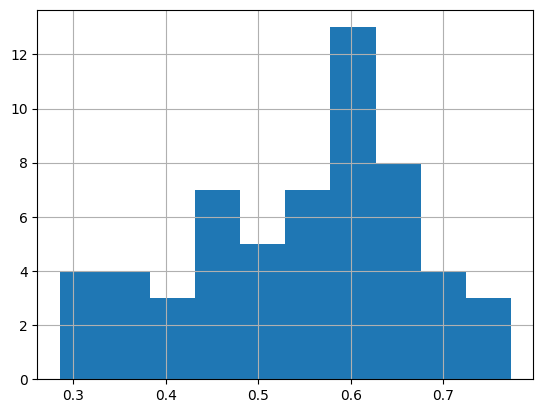

In [59]:
#View histogram of probabilities
chart_tracks_df['predicted_genre_prob'].hist()

> Q: Can you identify tracks that were misclassfied by the model?
    Does it make sense that the model misclassfied the tracks given the model configuration? Why or why not?

In [60]:
#Check tracks classified with higher probability
chart_tracks_df[chart_tracks_df['predicted_genre']=='rock'][['track_name','artist_name','predicted_genre','predicted_genre_prob']]\
            .sort_values(['predicted_genre_prob'],ascending=False)[:10]

,track_name,artist_name,predicted_genre,predicted_genre_prob


In [61]:
#Check tracks classified with lower probability
chart_tracks_df[chart_tracks_df['predicted_genre']=='rnb'][['track_name','artist_name','predicted_genre','predicted_genre_prob']]\
            .sort_values(['predicted_genre_prob'],ascending=False)[:10]

,track_name,artist_name,predicted_genre,predicted_genre_prob


>Q **Spot Check**: Check out a song you're familiar with and see if the predicted genres and probabilities makes sense

In [62]:
chart_tracks_df[chart_tracks_df['track_name'].str.contains('Bohemian')]

,Unnamed: 0,track_name,track_id,artist_name,danceability,energy,key,loudness,mode,speechiness,...,tempo,predicted_genre_id,predicted_genre,predicted_genre_prob,predicted_opm acoustic_prob,predicted_opm dance_prob,predicted_opm jazz_prob,predicted_opm rap_prob,predicted_opm reggae_prob,predicted_opm rock_prob


In [63]:
#save data
chart_tracks_df.to_csv("tracks_data_with_proba.csv", index=False, encoding='utf-8')

## Caveats
1. Using playlist names as genre tags heavily rely on *user opinion* and not *extracted music features* (compare this from the methods used in the [GTZAN genre collection dataset](https://data-flair.training/blogs/python-project-music-genre-classification/)
2. Playlists with dual genre names exists, and appear quite often in the dataset (e.g. Electronic Pop, Classical Rock)
3. Although a dominant genre could be readily observed, recent music tend to incorporate many genres at a time and thus create less distinction when the model looks at the audio features.

>Q: What other caveats could you deduce from the steps done above?


## Model Improvement
To enhance the model accuracy, try to do the following:
1. Pick "purer" top-followed playlists for the training data. A quick way to do this is to pick playlists that contain pre 2000's music as majority as these are less hybridized than more recent songs.
2. Try fewer but broader genres as categories (4-5 genres)
3. Remove outlier songs! These are the songs that dont fit its playlist's description. A bit subjective (and tedious!).
4. Limit the features used as predictors (could be inferred from the list of genres you're considering)
